# Cluster analysis of image patches vectorized by EfficientNet B0

# Set up EfficientNet B0 with wieghts trained on ImageNet

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np   
import cv2


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.keras.applications import EfficientNetB0

# Instantiate the EfficientNetB0 architecture
model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)



In [5]:
# Print the model summary
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

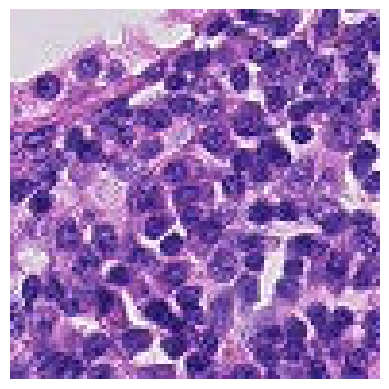

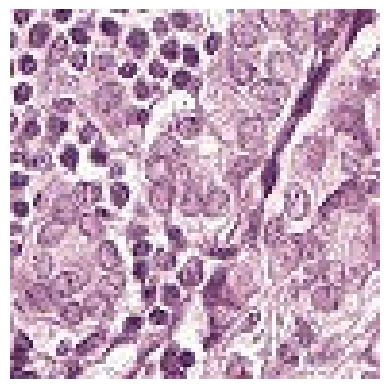

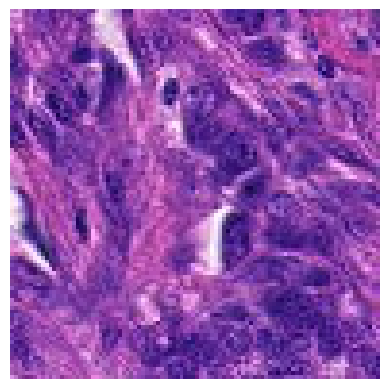

In [6]:
#show some images as an example
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file in read mode
with h5py.File('/Users/scott/Desktop/cluster_test/camelyonpatch_level_2_split_train_x.h5', 'r') as file:
    # Access the 'x' dataset from the file
    x_train = file['x']

    # Display the first three images
    for i in range(3):
        image = x_train[i]  # Get the image data
        plt.imshow(image)
        plt.axis('off')  # Remove axis labels
        plt.show()

In [7]:
with h5py.File('/Users/scott/Desktop/cluster_test/camelyonpatch_level_2_split_train_x.h5', 'r') as file:
    # Access the 'x' dataset from the file
    x_train = file['x']

    # Get the first image from the dataset
    image = x_train[0]

    # Obtain the height, width, and channels of the image
    height, width, channels = image.shape

    print("Height:", height)
    print("Width:", width)
    print("Channels:", channels)

Height: 96
Width: 96
Channels: 3


In [8]:
#store the dataset x of the huge h5 file in the variable x_train
file = h5py.File('/Users/scott/Desktop/cluster_test/camelyonpatch_level_2_split_train_x.h5', 'r')

# Access the dataset 'x'
x_train = file['x'][:]

In [9]:
# Number of images
print("Number of images in x_train:", x_train.shape[0])

Number of images in x_train: 262144


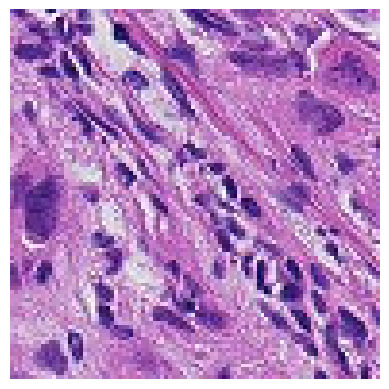

In [11]:
#show an image of your choice
image = x_train[9]  # Get the image data
plt.imshow(image)
plt.axis('off')  # Remove axis labels
plt.show()

# Get features from second to last layer (by ChatGPT)

In [10]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [11]:
#Preprocess
# Get the number of images
num_images = x_train.shape[0]

# Create an empty array for resized images
resized_images = np.empty((num_images, 224, 224, 3), dtype=np.uint8)

# Resize each image to 224x224
for i in range(num_images):
    image = x_train[i]
    resized_image = cv2.resize(image, (224, 224))
    resized_images[i] = resized_image


In [12]:
'''
The preprocessing logic has been included in the efficientnet model implementation. 
Users are no longer required to call this method to normalize the input data. 
This method does nothing and only kept as a placeholder to align 
the API surface between old and new version of model.
'''

# Preprocess the images in x_train to match the input shape of the EfficientNet-B0 model:
x_train_preprocessed = tf.keras.applications.efficientnet.preprocess_input(resized_images)

In [13]:
# Obtain the features by applying 2D average pooling to the output of the pre-activation layer:
features = model.predict(x_train_preprocessed)
features_pooled = np.mean(features, axis=(1, 2))  # Apply 2D average pooling

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# Save the features to a CSV file:
df = pd.DataFrame(features_pooled)
df.to_csv('features.csv', index=False)